In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import skimage.util as sk_util
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np
import matplotlib



plt.gray()
lena= rgb2gray(imread('../lab_images/lena.tiff'))
cameraman = imread('../lab_images/cameraman.tif').astype(np.float64)/255


def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Original Lena Image')

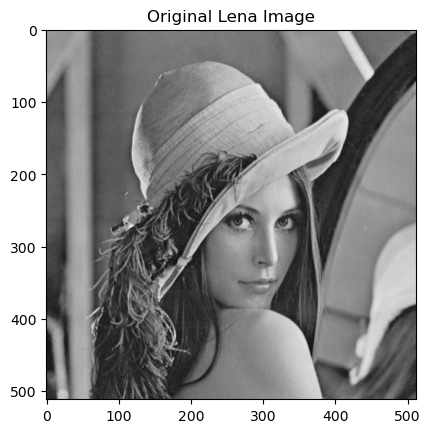

In [2]:
plt.imshow(lena, vmin = 0, vmax = 1.0)
plt.title("Original Lena Image")

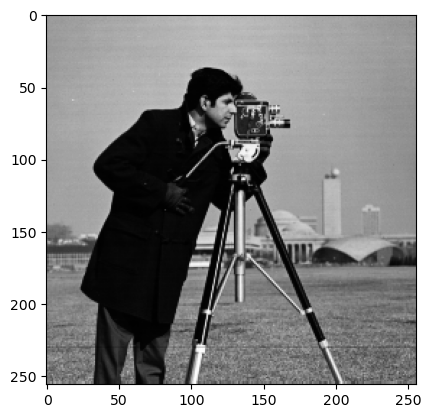

In [3]:
plt.imshow(cameraman)

### 2. Discrete Convolution for Image Processing

In [4]:
# create the impulse responses as filters
h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1, 1]])
h1, h2, h3

(array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]]),
 array([[0.16666667],
        [0.16666667],
        [0.16666667],
        [0.16666667],
        [0.16666667],
        [0.16666667]]),
 array([[-1,  1]]))

In [5]:
y1_lena = signal.convolve2d(lena, h1, mode="same")
y2_lena = signal.convolve2d(lena, h2, mode="same")
y3_lena = signal.convolve2d(lena, h3, mode="same")
y1_lena.shape, y2_lena.shape, y3_lena.shape

((512, 512), (512, 512), (512, 512))

Text(0.5, 1.0, 'Lena Convolved With h1')

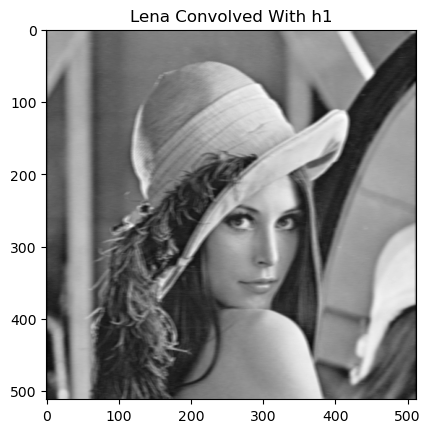

In [6]:
plt.imshow(y1_lena)
plt.title("Lena Convolved With h1")

Text(0.5, 1.0, 'Lena Convolved With h2')

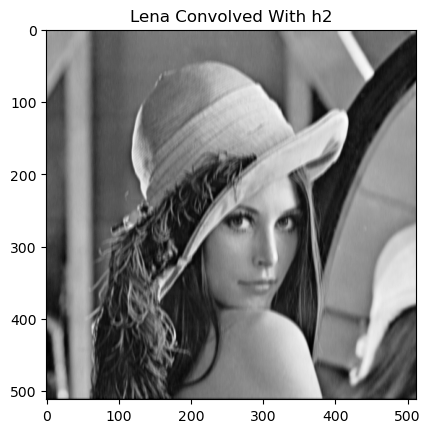

In [7]:
plt.imshow(y2_lena)
plt.title("Lena Convolved With h2")

Text(0.5, 1.0, 'Lena Convolved With h3')

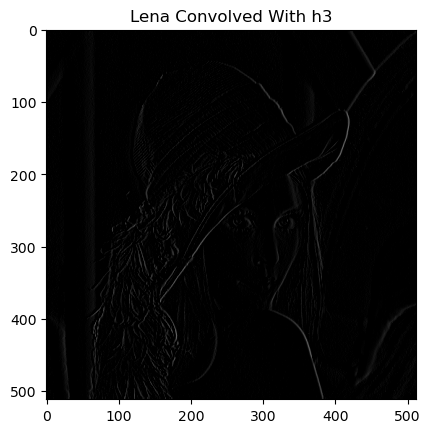

In [8]:
plt.imshow(y3_lena, vmin=0, vmax=1)
plt.title("Lena Convolved With h3")

1. What did convolving the image with h1 do to the image? Looking at the impulse function, explain why convolving the image with h1 yields such results.

It blurred the image. This occured because the impulse function is an average filter, which is a low pass (the weights are all positive, with a DC gain of 1). The result is expected because the image is averaging the 6 horizontally adjacent pixels which removes high frequency signals and blurs the image as the average continues sliding over the image to make the final output. 

2. What did convolving the image with h2 do to the image? Looking at the impulse function, explain why convolving the image with h2 yields such results.

Convolving with h2 also blurred the image. The properties of h2 and very similar to h1 (DC gain 1 and all positive weights) which means it is a blurring filter. The difference this time is that the filter is vertically stacked, so it will take the average of the 6 vertical adjacent pixels - which removes high frequency signals via blurring. 

3. What did convolving the image with h3 do to the image? Looking at the impulse function, explain why convolving the image with h3 yields such results.

Convolving the image with h3 extracts edges from the image. The impulse response is [-1 1] which has a DC gain of 0 with both positive and neegative weights, telling us that the filter is an edge detector. Furthermore, the convolution with this filter is doing the operation y[m, n] = f[m+1, n] - f[m, n], which is the discrete derivative (used specifically for vertical edge detection). Evidently, vertical edges are being detected.

4. Based on these results, what role can convolution perform in the context of image processing?

Convolution can perform the role of a filter operator, capable of applying a filter onto an image and generate a resultant output image. 

## 3. Noise Generation

In [9]:
def im_hist_show(image, image_title, histogram_title, vmin=0, vmax=1):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    image_flattened = image.flatten()
    axs[0].imshow(image, vmin=vmin, vmax=vmax)
    axs[1].hist(image_flattened)
    axs[0].set_title(image_title)
    axs[1].set_title(histogram_title)
    axs[1].set_xlabel("Pixel Intensity (k)")
    axs[1].set_ylabel("Pixel Count (n_k)")

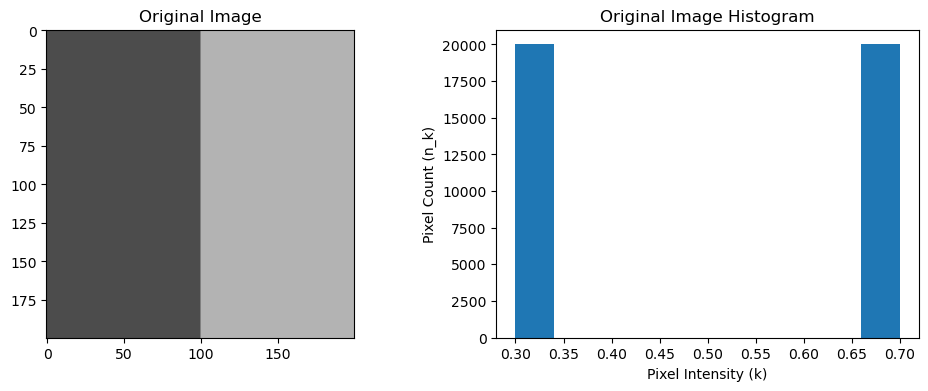

In [10]:
f = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])
# plt.imshow(f, vmin=0, vmax=1)
im_hist_show(f, "Original Image", "Original Image Histogram")

In [11]:
# plt.hist(f.flatten())
# plt.title("OG Histogram")

In [12]:
def imnoise_speckle(im, v):
    # im: input image
    # v: variance
    n = np.sqrt(v*12) * (np.random.rand(im.shape[0], im.shape[1]) - 0.5)
    print(n)
    return im + im * n

In [13]:
    # (200, 200).shape

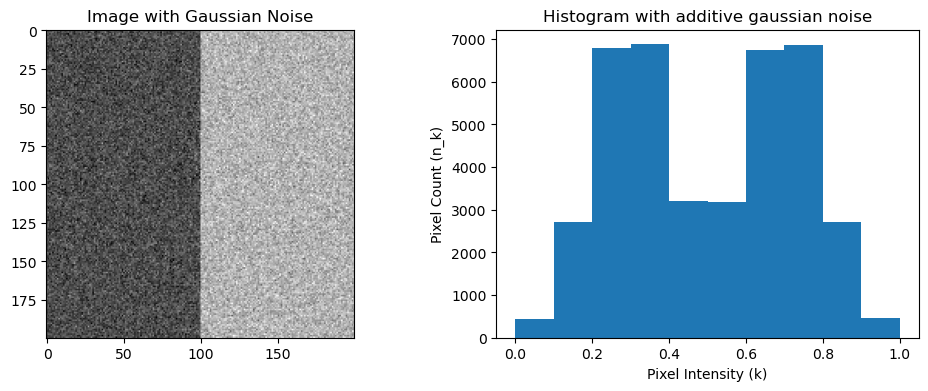

In [14]:
# apply zero mean and variance 0.01 gaussian noise
f_gaussian_noise = sk_util.random_noise(f, mode="gaussian")
# plt.imshow(f_gaussian_noise, vmin = 0, vmax = 1)
im_hist_show(f_gaussian_noise, "Image with Gaussian Noise", "Histogram with additive gaussian noise")

In [15]:
# plt.hist(f_gaussian_noise.flatten())
# plt.title("Histogram with additive gaussian noise")

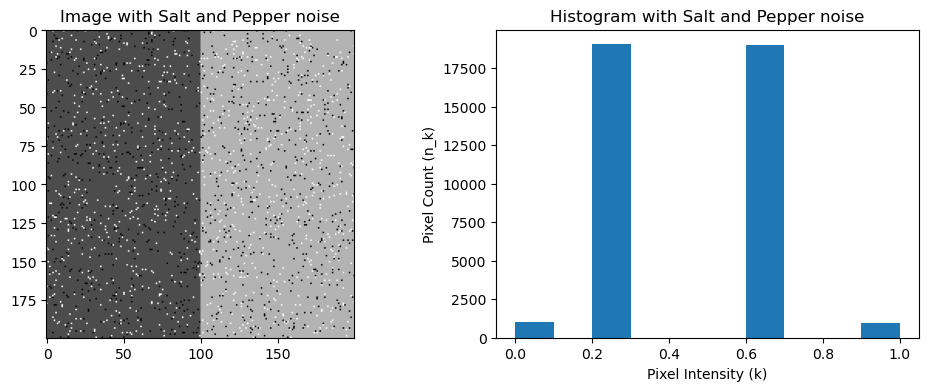

In [16]:
# apply salt and pepper noise
f_s_and_p_noise = sk_util.random_noise(f, mode="s&p")
# plt.imshow(f_s_and_p_noise, vmin = 0, vmax = 1)
im_hist_show(f_s_and_p_noise, "Image with Salt and Pepper noise", "Histogram with Salt and Pepper noise")

In [17]:
# plt.hist(f_s_and_p_noise.flatten())
# plt.title("Histogram with Salt and Pepper noise")

[[ 0.07274236  0.05665141  0.25468891 ... -0.19616909 -0.20791625
  -0.32097894]
 [-0.02716073  0.34379578 -0.26521403 ... -0.25795876 -0.22484073
   0.26837243]
 [ 0.1322054   0.05170643  0.02238724 ...  0.10227374 -0.34281272
   0.25807437]
 ...
 [-0.17869205  0.25523641  0.23212691 ...  0.22293302 -0.07433118
  -0.1012085 ]
 [ 0.0299461  -0.30478118  0.11848255 ...  0.12126458 -0.23646887
   0.27877095]
 [ 0.19578423 -0.00334461 -0.08825859 ... -0.23975041 -0.06598688
   0.25077822]]


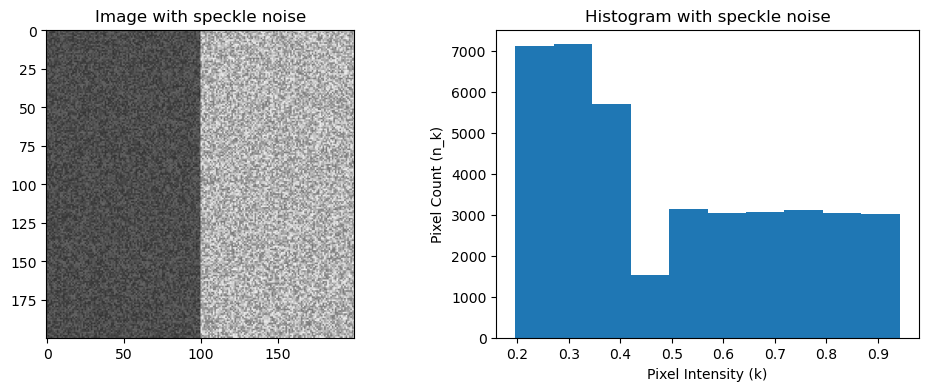

In [18]:
speckle_variance = 0.04
f_speckle_noise = imnoise_speckle(f, speckle_variance)
im_hist_show(f_speckle_noise, "Image with speckle noise", "Histogram with speckle noise")
# plt.imshow(f_speckle_noise, vmin = 0, vmax = 1)

In [19]:
# plt.hist(f_speckle_noise.flatten())
# plt.title("Histogram with speckle noise")

## P3 Questions.

5. Describe each of the histograms in the context of the corresponding noise models. Why do they appear that way?

Gaussian: The histogram for the gaussian noise model looks like 2 discrete gaussian 'curves', centered at 0.3 and 0.7. It appears this way since we are adding mean 0 noise to an image that has 2 peak intensities. Thus, the 2 peaks become similar to gaussians as the majority of their values stay at the peak (mean 0), but some lower proportion get spread, with a standard deviation of 0.1 from the peaks (like a gaussian distribution).

Salt and Pepper: The histogram still has the majority of values at 0.3 and 0.7 as in the original, but some pixels have been moved to 0 and 1 (about 5% of pixels moved). This makes sense since the salt and pepper noise is randomly moving 5% of pixels to either 0 or 1, which is shown by the histogram. 

Speckle: This histogram is more strange; it has a lot of very dark pixels, with a quick drop-off around 0.5, and then a uniform-like distributuion from 0.5 to 1. In general, this noise model is adding multiplicative uniform noise to the original image. The multiplicative aspect means that the noise is proportional to the pixel intensities. As such, high pixel intensity values have the potential to be moved more strongly, which is why the peak near 0.7 has been very spread out between 0.5 and 0.9 seemingly. The 0.3 pixel intensity seems to be more squished as a result of the lower pixel intensity. Since the noise is proportional to intensity, it moves the pixel values less and thus get closely clumped to 0.3. 

6. Are there visual differences between the noise contaminated images? What are they? Why?

Yes there are - and they generally follow the histogram observations. The salt and pepper noise clearly stands out - and we can visually see point-wise where the noise has been applied. This is expected since random pixels have been flipped to 0 or 1 with a density of 5%, so we can generally see where this has happened. 

The gaussian and speckly noise images are more similar since the contaminated noise has spread out the pixel intensities in both images, but has caused different spreads. The gaussian noise appears to be lighter in general, as both the light and dark peaks in the image have been retained. However, the speckle noise appears darker, as the light peak has been reduced greatly and the dark peak still exists (evident by the over-all dark image).

7. In the speckle noise case, what is the underlying distribution used? Can you tell from the histogram? How?

In the speckle noise case, the underlying distribution is the uniform distribution. The histogram somewhat shows this, as the lower intensity peak at 0.3 seems to have a small uniform distribution along it. However, it is more evident in the higher peak, which generally does follow a uniform distribution between [0.5 and 1]. 

8. In the speckle noise case, you will notice that the peaks of the histogram are no longer of the same height as they were in the original image. Also, the spread around each of the peaks is also different from each other. Why? Hint: Noise is multiplicative

Answered in some of the previous responses, but the main reason for this the multiplicative noise which is proporitional to the image intensity. Thus, at the lower peak, the noise is lower in general and spreads the lower peak by smaller amounts (resulting still in a defined lower section, although more spread). The higher peak experiecnes higher noise (as the noise is proportional to the high intensity). As a result, the high peak spreads out more strongly and stops looking like a peak at all - it resembles a uniform distribution. 

## P4. Noise Reduction in Spatial Domain

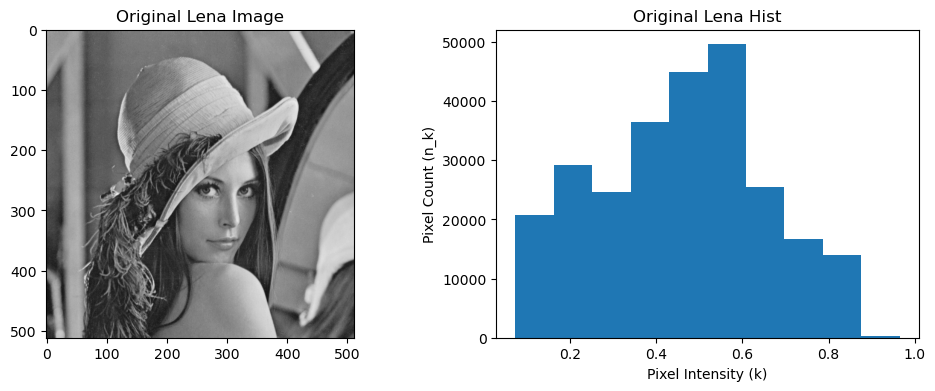

In [20]:
im_hist_show(lena, "Original Lena Image", "Original Lena Hist")

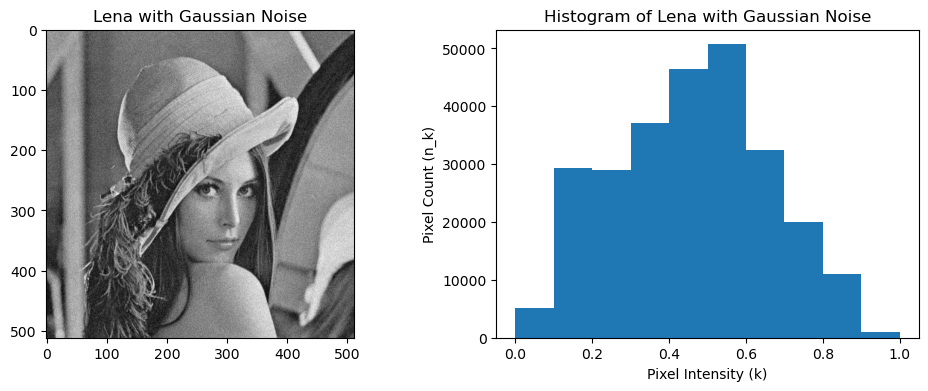

In [21]:
lena_noisy = sk_util.random_noise(lena, mode="gaussian", var=0.002)
im_hist_show(lena_noisy, "Lena with Gaussian Noise", "Histogram of Lena with Gaussian Noise")

In [22]:
print(f"The PSNR between the original and noisy lena image is: {round(PSNR(lena, lena_noisy), 3)}")

The PSNR between the original and noisy lena image is: 26.992


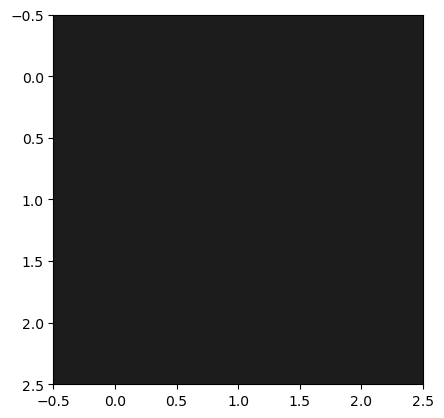

In [23]:
avergae_filter = np.ones((3,3))/(3.0*3.0)
plt.imshow(avergae_filter, vmin=0, vmax=1)

In [24]:
avergae_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

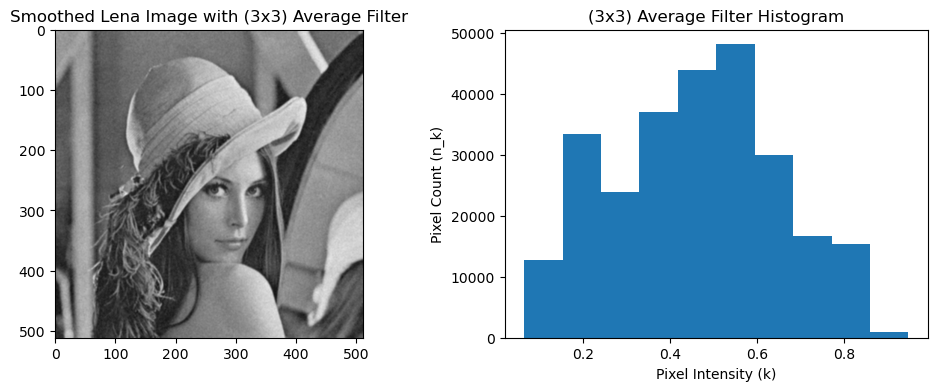

In [25]:
lena_smoothed_1 = ndimage.convolve(lena_noisy, avergae_filter)
im_hist_show(lena_smoothed_1, "Smoothed Lena Image with (3x3) Average Filter", "(3x3) Average Filter Histogram")

In [26]:
print(f"The PSNR between the original and smoothed lena image is: {round(PSNR(lena_smoothed_1, lena), 3)}")

The PSNR between the original and smoothed lena image is: 31.615


9. Compare the visual difference between the noisy image and the denoised image. How well did it work? Why? Did the PSNR decrease?

Visually, the noisy image has more detailed and looks a more pixelated than the denoised image. The denoising worked OK. Some of the noise was removed by denoising, but the noisy image looks more visually appealing as a result of having more defined edges. This is a result of the average filter blurring, making the resulting picture of lower quality. The PSNR also increased for the denoised image, likely as a result of the averaging removing some of the noise and making it closer to the original image (however, it got rid of some other details as well). The difference is subjective... it isn't clear. 

10. Compare the histograms of the noise-free, noisy, and denoised images. What happened? Why?

The noise-free and noisy histograms look quite similar, with the exception intensities near the middle ranges (0.3 and 0.6) and the end intensities (0 and 1)increasing for the noisy image (slightly spread the intensities). The denoised image histogram seems to have spread the intensities even more. The difference between the noise-free and noisy histograms occurs because the lena image has most pixels distributed along the middle intensities, which was slightly spread by adding the gaussian noise. It also happened to add some lower and higher pixel values as a result of the variance of the gaussian noise. The denoised image looks even more spread and equal, as a result of the weak smoothing caused by the average filter. 


11. Based on visual quality of the denoised image, what are the benefits and drawbacks associated with the average filter?

Benefits: Removes noise, particularly any high frequency noise.
Drawbacks: May over-smooths the image, leading to a more blurry image than the original (which makes the denoised image of "lower" quality)

In [27]:
average_filter_7_7 = np.ones((7,7))/(7.0*7.0)
average_filter_7_7.shape

(7, 7)

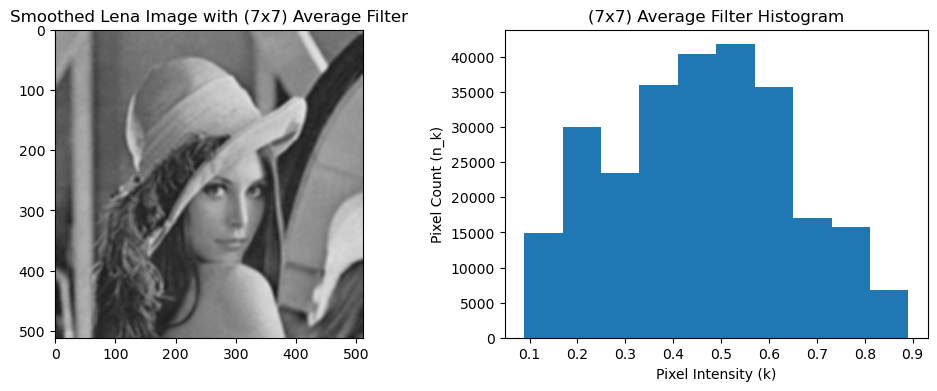

In [28]:
lena_smoothed_2 = ndimage.convolve(lena_noisy, average_filter_7_7)
im_hist_show(lena_smoothed_2, "Smoothed Lena Image with (7x7) Average Filter", "(7x7) Average Filter Histogram")

In [29]:
print(f"The PSNR between the original and 7x7 average filter smoothed lena image is: {round(PSNR(lena_smoothed_2, lena), 3)}")

The PSNR between the original and 7x7 average filter smoothed lena image is: 27.061


12. Compare the visual difference between the denoised image from the 7×7 filtering kernel and the denoised image from the 3×3 filtering kernel. Are there any differences? Why? Did the PSNR decrease? Why?

The denoised image from the 7x7 filter is much more blurred. This is a result of the increased filter size, which took more pixels when computing the convolution and blurred the image even more. Evidently, the PSNR for the 7x7 image blur decreased compared to the 3x3 average filter as some of the signal was lost in the image, the large amount of smoothing meant more error as high frequency signals were removed.

13. Compare the histograms of the two denoised images. What are the differences? Why?

The histograms are relatively similar, except that the peak of the intensity values in the 7x7 has flattened out, and the ends (near 0 and 1) have more pixels as well. This is a result of the pixel average over larger patches taking on the mean pixel value, which flattens out the intensity histogram. 

14. Based on visual quality of the denoised image, what are the benefits and drawbacks associated with using a larger window size?

Larger window size is able to remove the noise even more, as it is now even less evident, however, it also removed a lot more of the signal and strongly blurs the image.

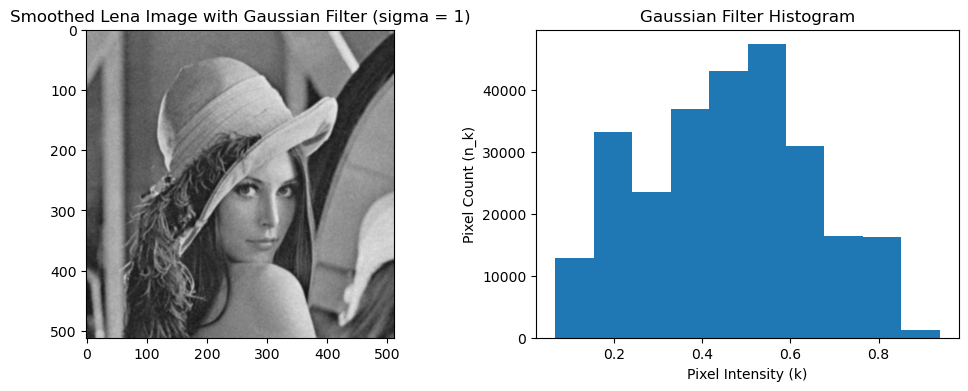

In [30]:
gaussian_filter_std_1 = gaussian_filter(7, 7, 1)
lena_smoothed_3 = ndimage.convolve(lena_noisy, gaussian_filter_std_1)
im_hist_show(lena_smoothed_3, "Smoothed Lena Image with Gaussian Filter (sigma = 1)", "Gaussian Filter Histogram")

In [31]:
print(f"The PSNR between the original and gaussian filter with standard deviation = 1 smoothed lena image is: {round(PSNR(lena_smoothed_3, lena), 3)}")

The PSNR between the original and gaussian filter with standard deviation = 1 smoothed lena image is: 31.624


15. Compare the visual difference between the denoised image from the Gaussian filtering kernel and the denoised images from the averaging filter kernels. Are there any differences? Why? Did the PSNR decrease? Why?

In general, the Gaussian filtering performs much better than the (7x7) average filter, but visually relatively similar to the (3x3) average filter. The gaussian filter may preserve details slightly better, but not generally noticeable. The reason is that the Gaussian filter performs a weighted average filter that weighs the central pixel more strongly, and the surrounding pixels less and less. This provides better smoothing results as the local neighborhood of the filter is weighted in a more desireable way than the smoothing filter. The PSNR increased a lot compared to the 7x7 average filter, but is quite similar to the 3x3 average filter. The reason for the increase compared to the 7x7 is that the image quality is generally better, thus higher PSNR. 

16. Compare the histograms of the denoised image using the Gaussian filtering kernel and the denoised images from the averaging filter kernels. What are the differences? Why?

In general, the histogram of the gaussian filter looks very simialr to that of the (3x3) filter. The reason is that the 3x3 average filter roughly approximates the gaussian filter as it places stronger weights on a small local neighborhood around a desired pixel - thus resulting in decent image quality with slight blur. The 7x7 histogram looks very different as it has averaged over a much larger neighborhood with strong effects of pixels far away, causing slight distortions in the histogram.

17. Based on visual quality of the denoised image, what are the benefits and drawbacks associated with using a Gaussian kernel as opposed to an averaging kernel?

Benefits: Computes a weighted average which produced a better result from image smoothing. Edges better preserved. There aren't drawbacks with the Gaussian kernel since it seems to perform at least as good as any of the averaging kernels


In [32]:
lena_s_and_p_noise = sk_util.random_noise(lena, mode="s&p")
lena_s_p_smoothed_avg = ndimage.convolve(lena_s_and_p_noise, average_filter_7_7)
lena_s_p_smoothed_gaussian = ndimage.convolve(lena_s_and_p_noise, gaussian_filter_std_1)

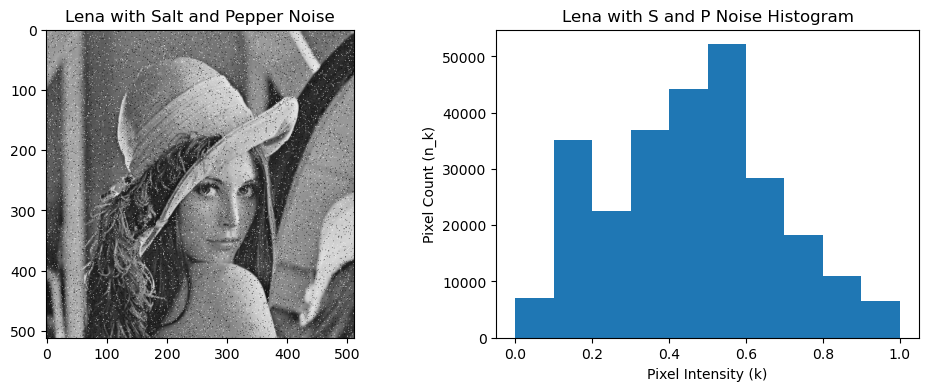

In [33]:
im_hist_show(lena_s_and_p_noise, "Lena with Salt and Pepper Noise", "Lena with S and P Noise Histogram")

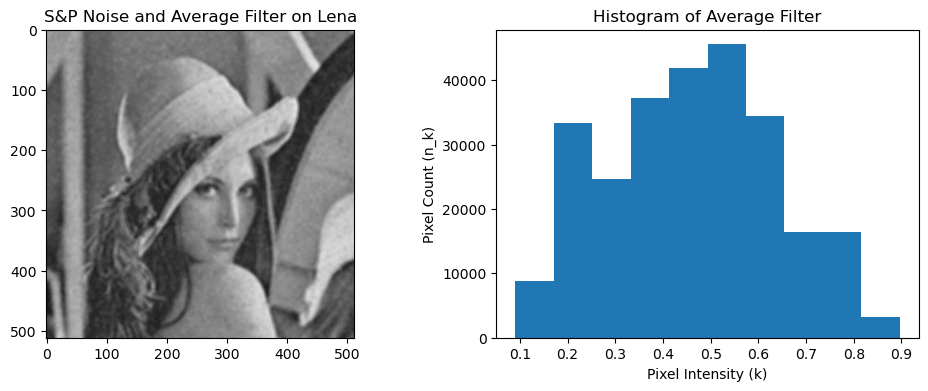

In [34]:
im_hist_show(lena_s_p_smoothed_avg, "S&P Noise and Average Filter on Lena", "Histogram of Average Filter")

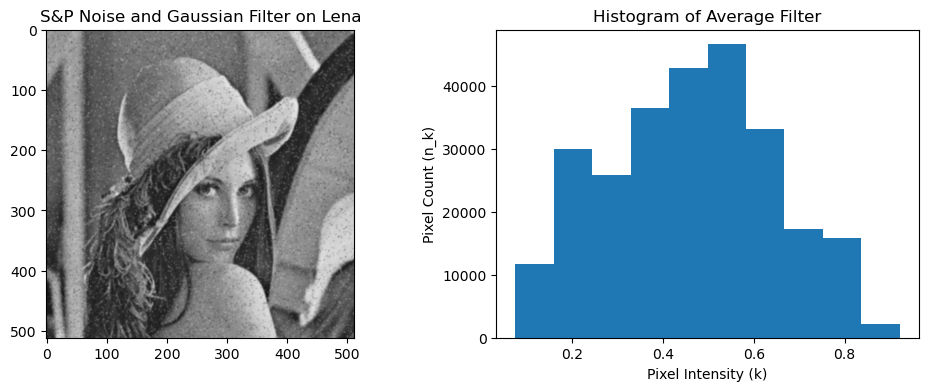

In [35]:
im_hist_show(lena_s_p_smoothed_gaussian, "S&P Noise and Gaussian Filter on Lena", "Histogram of Average Filter")

In [36]:
print(f"The PSNR between the original and gaussian filter with standard deviation = 1 smoothed lena image is: {round(PSNR(lena_s_p_smoothed_gaussian, lena), 3)}")
print(f"The PSNR between the original and (7x7) average filter smoothed lena image is: {round(PSNR(lena_s_p_smoothed_avg, lena), 3)}")

The PSNR between the original and gaussian filter with standard deviation = 1 smoothed lena image is: 27.399
The PSNR between the original and (7x7) average filter smoothed lena image is: 26.176


18. How does the averaging filter and Gaussian filtering methods perform on the noisy image in terms of noise reduction? Explain in terms of visual quality as well as PSNR. Why do we get such results?

The Gaussian filter performs better in terms of noise reduction, as the image of lena is more clear (less blurred) while masking the noise slightly. The average filter seems to reduce noise even more, but suffers strongly by having a highly blurred image. In terms of PSNR, the gaussian filter also appears to have better performance. These results occur since the large average filter picks up a lot of noise in the convolution, which results in a stronger blur. The gaussian filter weighs adjacent noise pixels less strongly, leading to better visual results.

19. Compare the histograms of the denoised images with that of the noisy image. What characteristics are present in all of the histograms? Why?

There are a number of pixels around 0 an 1 in each. This makes sense since the S&P noise randomly adds 0 or 1 pixels 5% of the time, thus we expect pixels near 0 or 1. Furthermore, they all seem to have the most pixel count at intensities around 0.5, which is kept after adding noise or performing any averaging around that pixel intensity (ie. we keep the mean values of pixel intensity after we perform an average or weighted average)


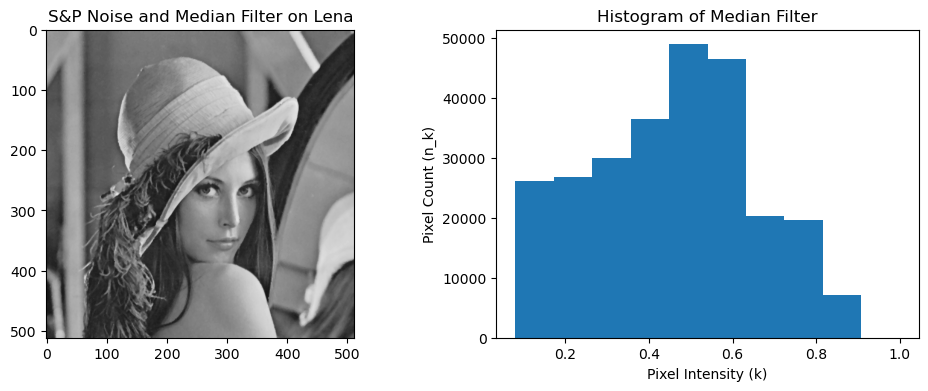

In [37]:
lena_s_p_smoothed_median = ndimage.median_filter(lena_s_and_p_noise, [3, 3])
im_hist_show(lena_s_p_smoothed_median, "S&P Noise and Median Filter on Lena", "Histogram of Median Filter")

In [38]:
print(f"The PSNR between the original and median filter smoothed lena image is: {round(PSNR(lena_s_p_smoothed_median, lena), 3)}")

The PSNR between the original and median filter smoothed lena image is: 34.273


20. How does the denoised image produced using the median filter compare with the denoised images produced using averaging filter (7x7) and Gaussian filtering methods? Explain in terms of visual quality as well as PSNR. Why do we get such results with median filter when compared to the other spatial filtering methods?

The denoised image produced by the median filter visually looks the best and has the highest PSNR values of all methods on the image with S&P noise. We get such results with the median filter because the median filter is very good at removing "impulse noise", which is the case with S&P noise that flips pixels to intensity 0 and 1. Since the pixels have randomly been flipped to 0 or 1, these pixels are likely outliers in their local neighborhood and will get filtered out when applying a median filter. The other spatial filters will apply these outliers to their averages, which will not provide great results

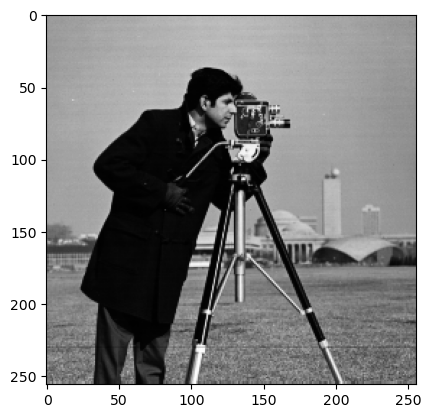

In [39]:
plt.imshow(cameraman)

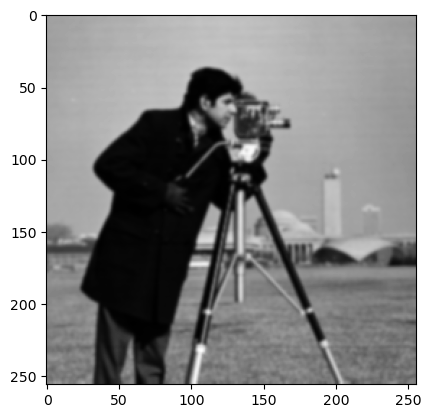

In [40]:
cameraman_gaussian_filtered = ndimage.convolve(cameraman, gaussian_filter_std_1)
cameraman_minus_gaussian_filtered = cameraman - cameraman_gaussian_filtered
plt.imshow(cameraman_gaussian_filtered)

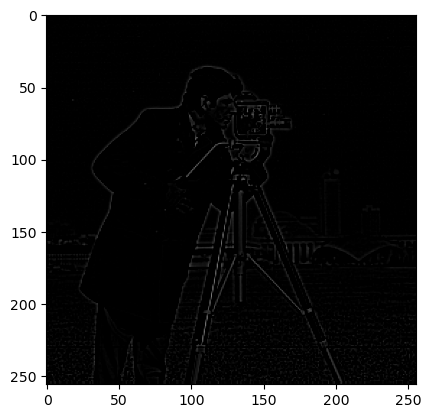

In [41]:
plt.imshow(cameraman_minus_gaussian_filtered, vmin=0, vmax=1)

21. What does the subtracted image look like? What frequency components from the original image are preserved in the subtracted image? Why?

The subtracted image looks like an image with only the edges retained. Thus, only high frequency components from the original image are preserved from the subtraction. This occurs since the gaussian filter is a low pass filter (keeps low frequency), then when we take an image and subtract away the low frequency components, we are left with the high frequency components (the edges)

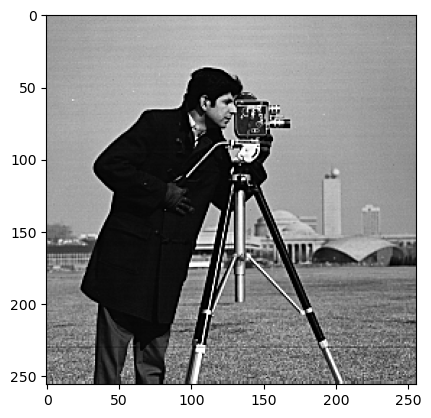

In [42]:
cameraman_sharpened = cameraman_minus_gaussian_filtered + cameraman
plt.imshow(cameraman_sharpened, vmin=0, vmax=1)

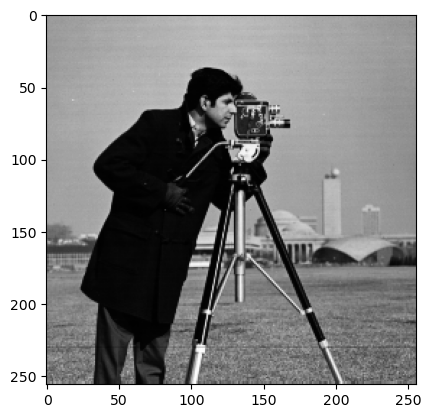

In [43]:
plt.imshow(cameraman)

22. What does the resulting image look like? How does it differ from the original image? Explain why it appears this way.

The resulting image has edges that have been highlighted even more; the image has been sharpened. This occurs because we added only the high frequency signals (the edges) to the original image, thus the edges were brought out even more and resulted in an even more defined image of the cameraman.

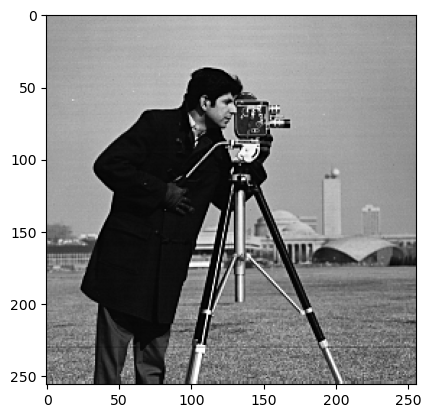

In [44]:
k = 0.5
cameraman_sharpened_2 = cameraman + k * cameraman_minus_gaussian_filtered
plt.imshow(cameraman_sharpened_2, vmin=0, vmax=1)

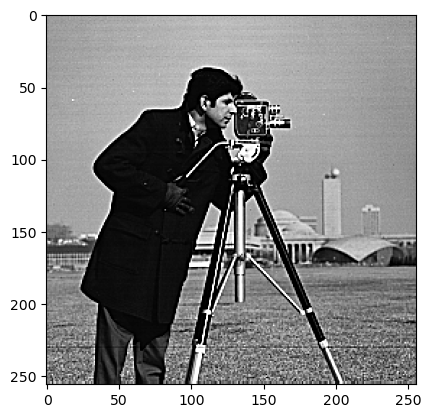

In [45]:
k = 2
cameraman_sharpened_3 = cameraman + k * cameraman_minus_gaussian_filtered
plt.imshow(cameraman_sharpened_3, vmin=0, vmax=1)

23. Compare the results produced by adding the subtracted image to the original image and that produced by adding half of the subtracted image to the original image How does it differ? Explain why it appears this way.

The new image (adding half of the subtracted image) has edges which are slightly sharpened, but not as much as the image before. This occurs since we are only adding half as much of the high frequency signal to the original cameraman image, thus the edges are less sharp than before.  


24. What does multiplying the subtracted image by a factor less than one accomplish? What about greater than one?

Multiplying the subtracted image by a factor less than one reduces the edges and more selectively chooses the edges to enhance in the image, making more less sharpening. Greater than one enhances the edges even more, but if put much higher than one it bring out high frequency noise in the original image. 